In [99]:
!pip install ucimlrepo
!pip install scikit-learn
! pip install -U imbalanced-learn

In [100]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
import pandas as pd


/var/folders/fq/75r_9ntn2fs06ff282s31zrw0000gn/T/ipykernel_17922/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [167]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

Summary and structure of the dataframe

In [71]:
df = pd.concat([X, y], axis=1)
dfUntouched = df.copy()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [102]:
df = dfUntouched.copy()

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [163]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [104]:
df.shape

(48842, 15)

Taking care of null values and special characters

Encode ? as NaNs

In [105]:
df[df == '?'] = np.nan

In [106]:
def missing_value(df):
    miss=[]
    col_list=df.columns
    for i in col_list:
        missing=df[i].isnull().sum()
        miss.append(missing)
        list_of_missing=pd.DataFrame(list(zip(col_list,miss)))
    return list_of_missing

missing_value(df)

,0,1
0,age,0
1,workclass,2799
2,fnlwgt,0
3,education,0
4,education-num,0
5,marital-status,0
6,occupation,2809
7,relationship,0
8,race,0
9,sex,0


In [107]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [108]:
missing_value(df)

,0,1
0,age,0
1,workclass,0
2,fnlwgt,0
3,education,0
4,education-num,0
5,marital-status,0
6,occupation,0
7,relationship,0
8,race,0
9,sex,0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [110]:
df.drop(['education'], axis=1, inplace=True)

Handaling inconsistant catogarical data

In [111]:
for column in df.columns:
    # Check if the column data type is object (i.e., categorical)
    if df[column].dtype == 'object':
        # Print the column name and its unique categorical values
        print(column + ":")
        print(df[column].unique())
        print()

workclass:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

marital-status:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']

relationship:
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race:
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex:
['Male' 'Female']

native-country:
['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Italy'
 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan'
 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France'
 'Guatem

In [112]:
df['income'] = df['income'].replace({'>50K.': '>50K', '<=50K.': '<=50K'})
print(df['income'].unique())

['<=50K' '>50K']


removing records with recorded income levels but "workclass" "Never-worked.”

In [113]:
never_worked_rows = df[df['workclass'] == 'Never-worked']
never_worked_rows.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18,Never-worked,206359,6,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,4,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,6,Never-married,Prof-specialty,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,7,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,10,Never-married,Prof-specialty,Own-child,Black,Male,0,0,40,United-States,<=50K


In [114]:
df = df[df['workclass'] != 'Never-worked']

Outliers

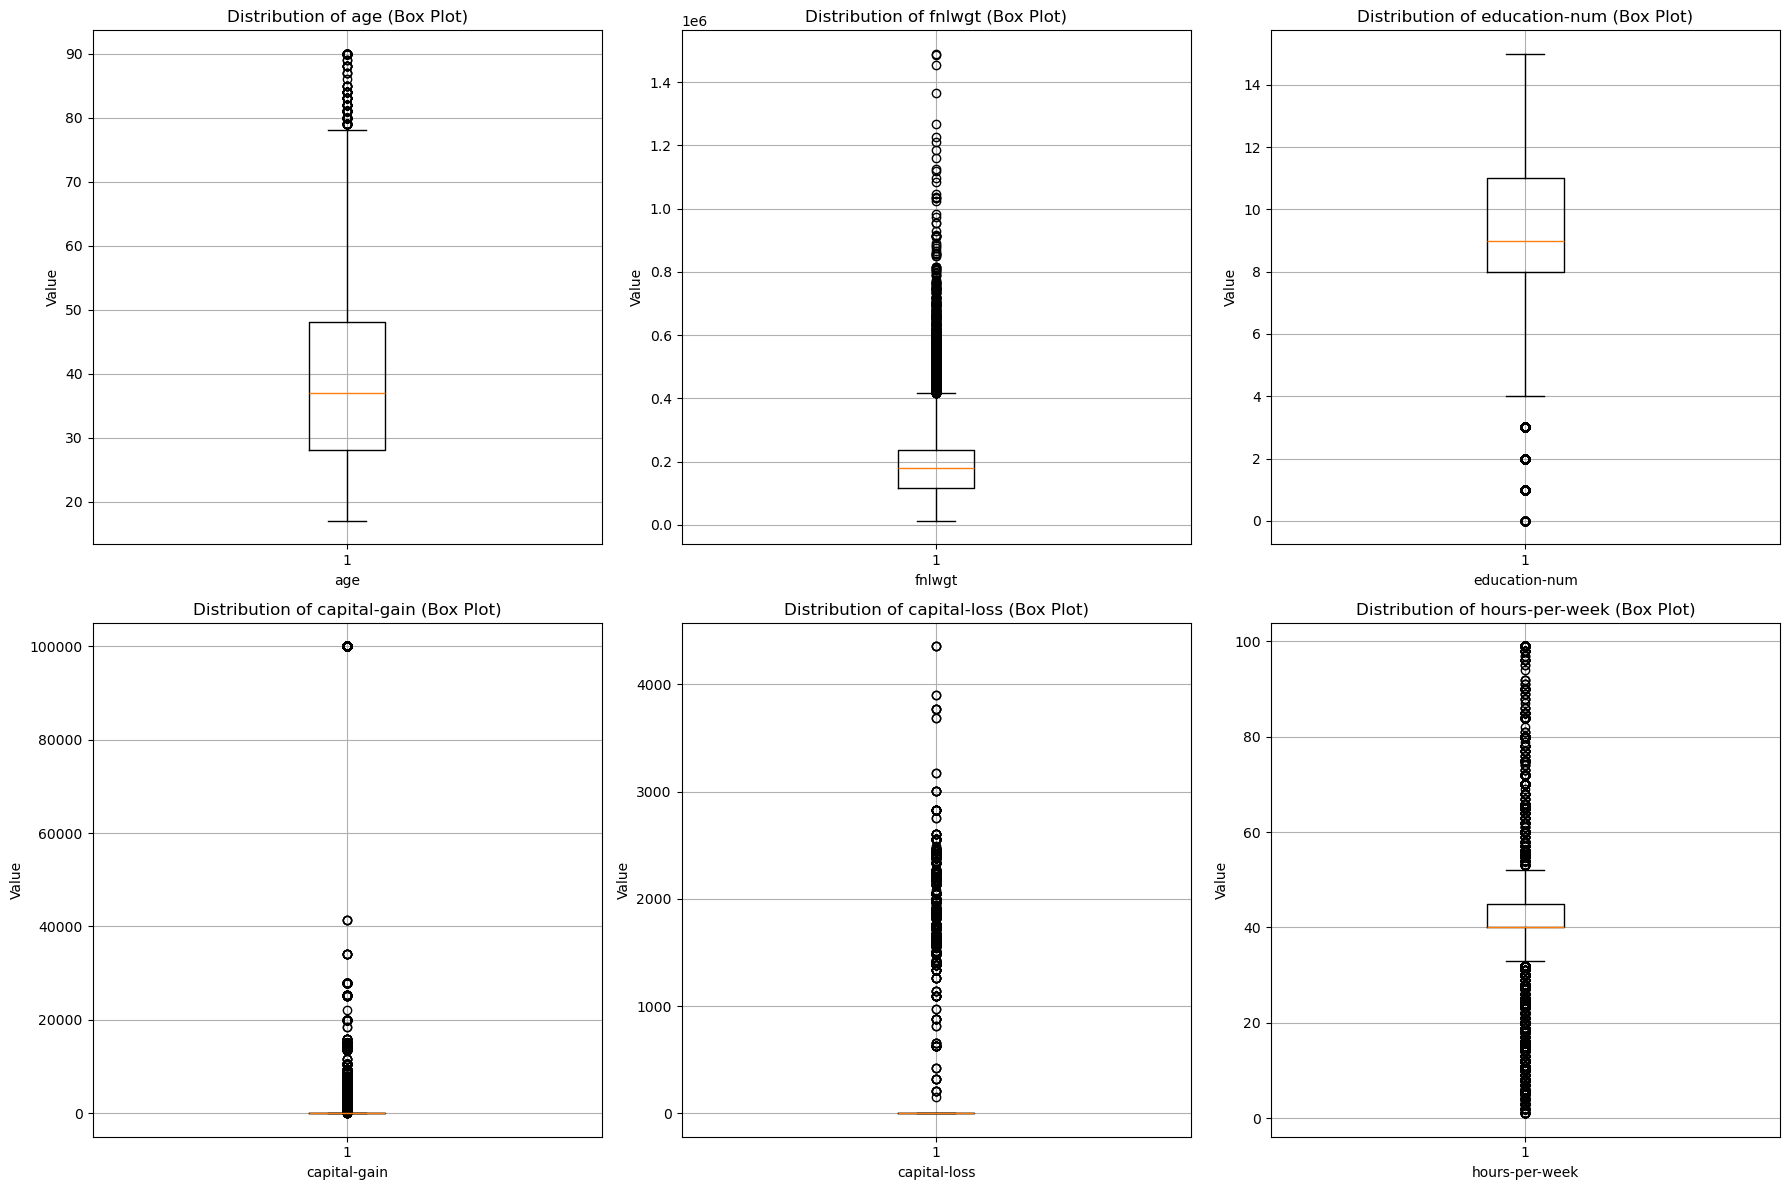

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a pandas DataFrame named 'df'

# Select the numerical columns
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Calculate the number of plots
num_plots = len(numerical_columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_plots + 2) // 3  # Adding 2 to round up
num_cols = min(num_plots, 3)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6*num_rows))

# Flatten the axes array if necessary
if num_plots > 1:
    axes = axes.flatten()

# Create box plots for each column
for i, col in enumerate(numerical_columns):
    axes[i].boxplot(df[col])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Distribution of {col} (Box Plot)')
    axes[i].grid(True)

# Hide empty subplots
for j in range(num_plots, num_rows*num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Feature Engineering (Encording catogarical variables)

In [116]:
from sklearn import preprocessing

categorical = ['workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','income']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
type(df)

pandas.core.frame.DataFrame

In [117]:
df.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,12,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,12,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,8,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,6,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,12,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,13,2,3,5,4,0,0,0,40,38,0
6,49,2,160187,4,3,7,1,2,0,0,0,16,22,0
7,52,4,209642,8,2,3,0,4,1,0,0,45,38,1
8,31,2,45781,13,4,9,1,4,0,14084,0,50,38,1
9,42,2,159449,12,2,3,0,4,1,5178,0,40,38,1


Feature Engineering (Scalling)

In [118]:
X = df.drop(['income'], axis=1)

y = df['income']

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# X_train.head()

Over-sampling

<Axes: ylabel='count'>

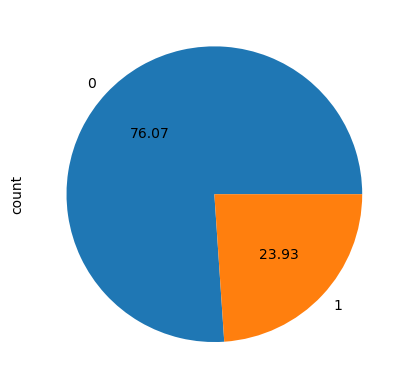

In [119]:
y.value_counts().plot.pie(autopct='%.2f')

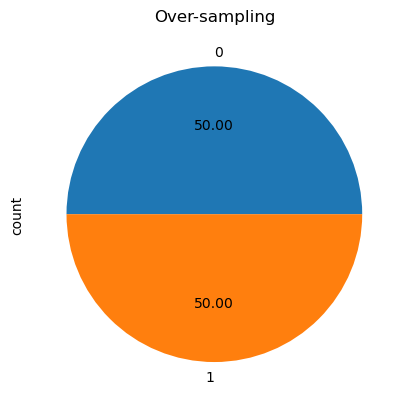

In [120]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

Test train split

In [121]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 0)
X_train.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
5557,38,2,114079,8,2,11,0,4,1,0,0,44,38
6482,43,2,170214,9,2,3,0,4,1,0,0,50,38
23702,32,2,113364,9,4,0,1,4,1,0,0,30,38
48855,32,2,105749,14,2,9,0,4,1,0,0,40,38
21002,28,2,339372,9,4,11,1,4,1,0,0,40,38


Correlation analysis

In [141]:
import pandas as pd  # Assuming you have pandas imported


correlation_matrix = df.corr()
income_correlation = correlation_matrix['income'].drop('income')

# Sort correlations in descending order and print them
sorted_correlation = income_correlation.abs().sort_values(ascending=False)
print("Correlation with income:")
print(sorted_correlation)


Correlation with income:
education-num     0.332561
relationship      0.253148
age               0.230266
hours-per-week    0.227631
capital-gain      0.223004
sex               0.214664
marital-status    0.199045
capital-loss      0.147535
race              0.070909
occupation        0.032636
native-country    0.020405
workclass         0.019600
fnlwgt            0.006312
Name: income, dtype: float64


Imbalanced classes

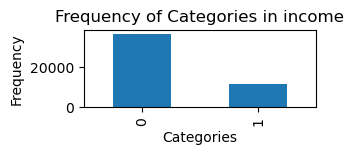

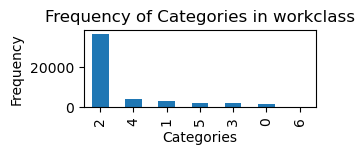

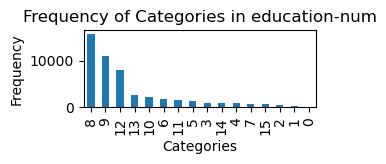

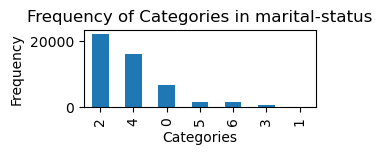

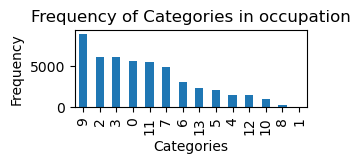

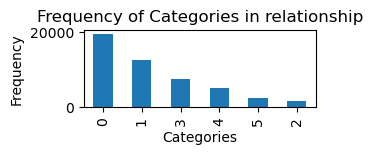

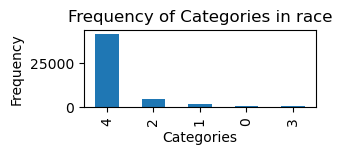

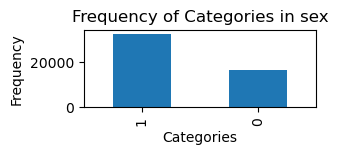

In [161]:
import matplotlib.pyplot as plt
columns = ['income', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

for i in columns:
    frequency = df[i].value_counts()
    plt.figure(figsize=(3, 1))
    frequency.plot(kind='bar')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title('Frequency of Categories in ' + i)
    plt.show()

In [122]:
x_train = X_train.copy()
x_test = X_test.copy()

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

X_train.head()
X_test.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.736171,-0.207049,0.430155,-1.379566,1.175484,-1.564854,1.737429,0.361107,-1.651906,-0.195493,-0.263069,0.488482,0.251257
1,-1.742320,2.878884,-1.488227,-0.229480,1.175484,-1.564854,1.120482,0.361107,0.605361,-0.195493,-0.263069,-2.648399,0.251257
2,0.734355,-0.207049,-0.207565,0.920605,-0.318046,-0.810160,-0.730360,0.361107,0.605361,-0.195493,-0.263069,-0.171914,0.251257
3,-1.277944,-0.207049,-0.179347,0.920605,1.175484,1.453920,-0.113413,0.361107,-1.651906,-0.195493,-0.263069,-1.822904,0.251257
4,0.269978,-0.207049,-1.439180,0.920605,-0.318046,-0.810160,-0.730360,0.361107,0.605361,-0.195493,3.642486,1.148877,0.251257


Principal Component Analysis (PCA)

In [127]:
from sklearn.decomposition import PCA


pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_




array([0.16535376, 0.09246635, 0.08773414, 0.08390144, 0.08015943,
       0.07705251, 0.07395342, 0.07300519, 0.06636415, 0.06425973,
       0.05854347, 0.05254217, 0.02466424])

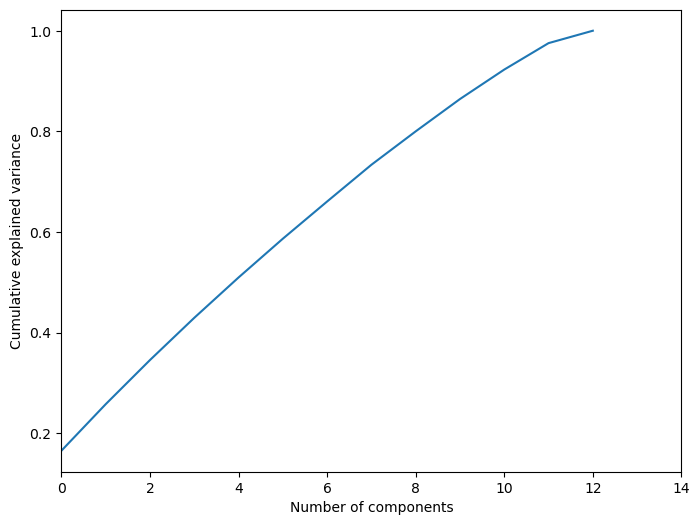

In [128]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

All 12 features 

In [166]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)
print('Naive Bayes accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_nb)))

# Random Forest
rf = RandomForestClassifier(n_estimators=100)  # Adjust n_estimators as needed
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)))

# Classification Report for Naive Bayes
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Classification Report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))



Naive Bayes accuracy score: 0.6775
Random Forest accuracy score: 0.9142
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.93      0.74     11027
           1       0.86      0.43      0.57     11260

    accuracy                           0.68     22287
   macro avg       0.74      0.68      0.66     22287
weighted avg       0.74      0.68      0.66     22287

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     11027
           1       0.89      0.95      0.92     11260

    accuracy                           0.91     22287
   macro avg       0.92      0.91      0.91     22287
weighted avg       0.92      0.91      0.91     22287



remove "native-counrty"

In [158]:
x_train_13 = X_train.copy()
x_test_13 = X_test.copy()

x_train_13 = x_train_13.drop(['native-country'] , axis=1)
x_test_13 = x_test_13.drop(['native-country'] , axis=1)
x_train_13.head()   


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,-0.200760,-0.213716,-0.723894,-0.611964,-0.326795,1.199573,-0.736473,0.365004,0.608911,-0.198719,-0.257498,0.152450
1,0.183438,-0.213716,-0.181182,-0.230107,-0.326795,-0.821851,-0.736473,0.365004,0.608911,-0.198719,-0.257498,0.641589
2,-0.661797,-0.213716,-0.730806,-0.230107,1.157619,-1.579885,-0.124045,0.365004,0.608911,-0.198719,-0.257498,-0.988873
3,-0.661797,-0.213716,-0.804428,1.679178,-0.326795,0.694217,-0.736473,0.365004,0.608911,-0.198719,-0.257498,-0.173642
4,-0.969156,-0.213716,1.454235,-0.230107,1.157619,1.199573,-0.124045,0.365004,0.608911,-0.198719,-0.257498,-0.173642


In [160]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train_13, y_train)
y_pred_nb = gnb.predict(x_test_13)
print('Naive Bayes accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_nb)))

# Random Forest
rf = RandomForestClassifier(n_estimators=200)  # Adjust n_estimators as needed
rf.fit(x_train_13, y_train)
y_pred_rf = rf.predict(x_test_13)
print('Random Forest accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)))

# Classification Report for Naive Bayes
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Classification Report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))




Naive Bayes accuracy score: 0.6751
Random Forest accuracy score: 0.9147
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.93      0.74     11027
           1       0.86      0.42      0.57     11260

    accuracy                           0.68     22287
   macro avg       0.74      0.68      0.65     22287
weighted avg       0.74      0.68      0.65     22287

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     11027
           1       0.88      0.96      0.92     11260

    accuracy                           0.91     22287
   macro avg       0.92      0.91      0.91     22287
weighted avg       0.92      0.91      0.91     22287



remove "fnlwgt"

In [155]:
x_train_fq = X_train.copy()
x_test_fq = X_test.copy()

x_train_fq = x_train_fq.drop(['fnlwgt'] , axis=1)
x_test_fq = x_test_fq.drop(['fnlwgt'] , axis=1)
x_test_fq.head()   

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.736171,-0.207049,-1.379566,1.175484,-1.564854,1.737429,0.361107,-1.651906,-0.195493,-0.263069,0.488482,0.251257
1,-1.742320,2.878884,-0.229480,1.175484,-1.564854,1.120482,0.361107,0.605361,-0.195493,-0.263069,-2.648399,0.251257
2,0.734355,-0.207049,0.920605,-0.318046,-0.810160,-0.730360,0.361107,0.605361,-0.195493,-0.263069,-0.171914,0.251257
3,-1.277944,-0.207049,0.920605,1.175484,1.453920,-0.113413,0.361107,-1.651906,-0.195493,-0.263069,-1.822904,0.251257
4,0.269978,-0.207049,0.920605,-0.318046,-0.810160,-0.730360,0.361107,0.605361,-0.195493,3.642486,1.148877,0.251257


In [157]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train_fq, y_train)
y_pred_nb = gnb.predict(x_test_fq)
print('Naive Bayes accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_nb)))

# Random Forest
rf = RandomForestClassifier(n_estimators=200)  # Adjust n_estimators as needed
rf.fit(x_train_fq, y_train)
y_pred_rf = rf.predict(x_test_fq)
print('Random Forest accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)))

# Classification Report for Naive Bayes
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Classification Report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Naive Bayes accuracy score: 0.6768
Random Forest accuracy score: 0.9019
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.93      0.74     11027
           1       0.86      0.43      0.57     11260

    accuracy                           0.68     22287
   macro avg       0.74      0.68      0.66     22287
weighted avg       0.74      0.68      0.66     22287

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     11027
           1       0.87      0.94      0.91     11260

    accuracy                           0.90     22287
   macro avg       0.90      0.90      0.90     22287
weighted avg       0.90      0.90      0.90     22287



remove "sex"

In [151]:
x_train_s = X_train.copy()
x_test_s = X_test.copy()

x_train_s = x_train_s.drop(['sex'] , axis=1)
x_test_s = x_test_s.drop(['sex'] , axis=1)
x_test_s.head()   

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country
0,-0.736171,-0.207049,0.430155,-1.379566,1.175484,-1.564854,1.737429,0.361107,-0.195493,-0.263069,0.488482,0.251257
1,-1.742320,2.878884,-1.488227,-0.229480,1.175484,-1.564854,1.120482,0.361107,-0.195493,-0.263069,-2.648399,0.251257
2,0.734355,-0.207049,-0.207565,0.920605,-0.318046,-0.810160,-0.730360,0.361107,-0.195493,-0.263069,-0.171914,0.251257
3,-1.277944,-0.207049,-0.179347,0.920605,1.175484,1.453920,-0.113413,0.361107,-0.195493,-0.263069,-1.822904,0.251257
4,0.269978,-0.207049,-1.439180,0.920605,-0.318046,-0.810160,-0.730360,0.361107,-0.195493,3.642486,1.148877,0.251257


In [154]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



# Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train_s, y_train)
y_pred_nb = gnb.predict(x_test_s)
print('Naive Bayes accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_nb)))

# Random Forest
rf = RandomForestClassifier(n_estimators=200)  # Adjust n_estimators as needed
rf.fit(x_train_s, y_train)
y_pred_rf = rf.predict(x_test_s)
print('Random Forest accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)))


# Classification Report for Naive Bayes
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Classification Report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Naive Bayes accuracy score: 0.6476
Random Forest accuracy score: 0.9154
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.94      0.72     11027
           1       0.86      0.36      0.51     11260

    accuracy                           0.65     22287
   macro avg       0.72      0.65      0.62     22287
weighted avg       0.72      0.65      0.62     22287

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     11027
           1       0.89      0.95      0.92     11260

    accuracy                           0.92     22287
   macro avg       0.92      0.92      0.92     22287
weighted avg       0.92      0.92      0.92     22287

